In [156]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [157]:
#load data
df_large = pd.read_csv('data/pokemon_large.csv')

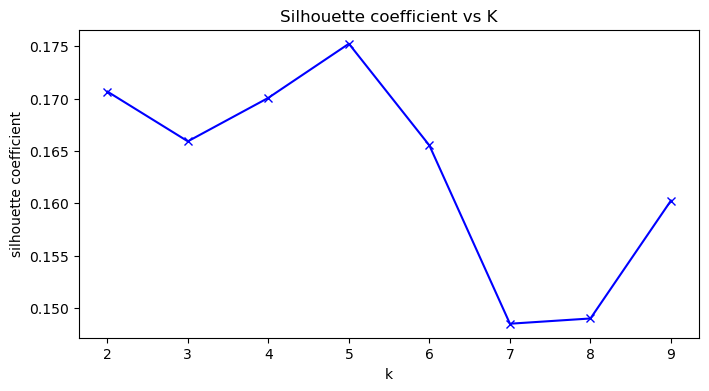

In [158]:
#silhouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 'auto')
    kmeanModel.fit(df_large)
    label=kmeanModel.predict(df_large)
    silhouettes.append(silhouette_score(df_large,label))
    
# plot silhouette
plt.figure(figsize=(8,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

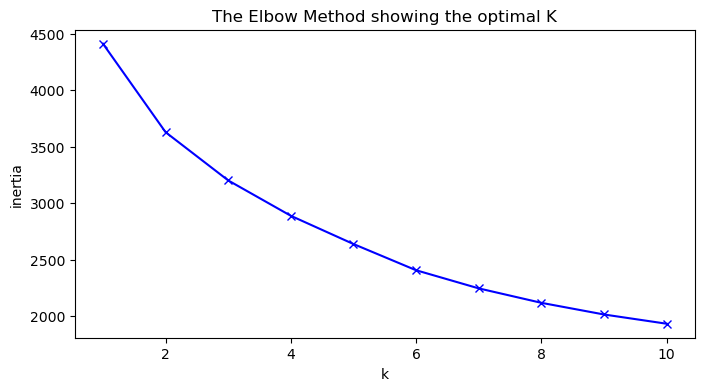

In [215]:
#elbow method with scaled data
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_large)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(8,4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [217]:
#Create Model
model = KMeans(5)

# Train model
model.fit(df_large)

# Make predictions
y_pred = model.predict(df_large)

In [218]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_large)

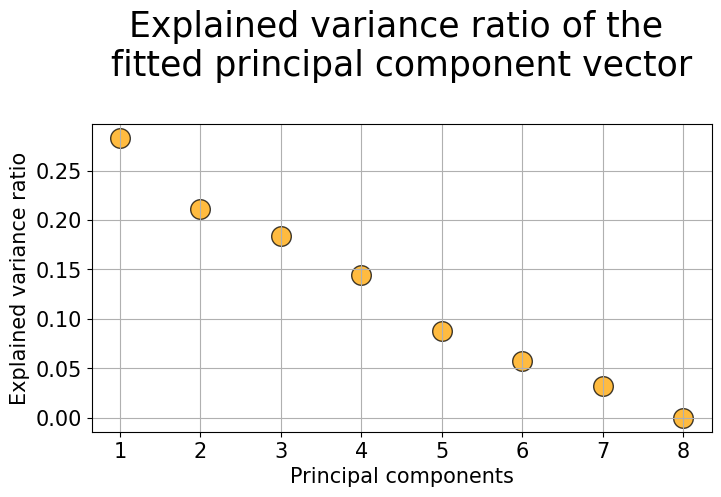

In [219]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [220]:
pca.explained_variance_ratio_

array([2.83262262e-01, 2.11145960e-01, 1.84269708e-01, 1.44571306e-01,
       8.81396155e-02, 5.69607328e-02, 3.16504160e-02, 9.95639555e-33])

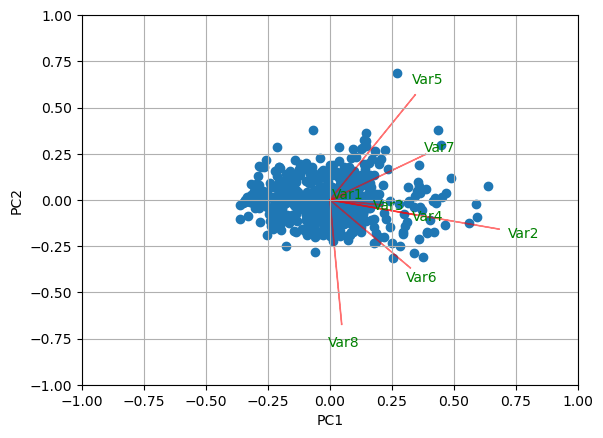

In [221]:
dfx_pca = pca.fit_transform(df_large)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(dfx_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

NameError: name 'c' is not defined

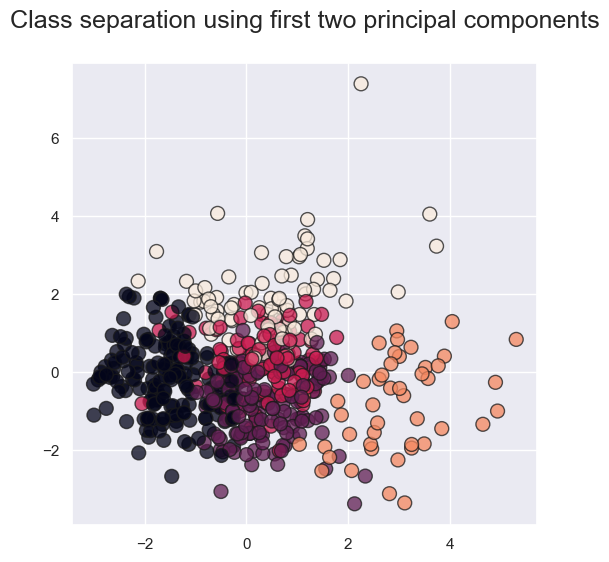

In [279]:
dfx_trans = pca.transform(df_large)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(6,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y_pred,edgecolors='k',alpha=0.75,s=100)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=18)
plt.legend(c)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

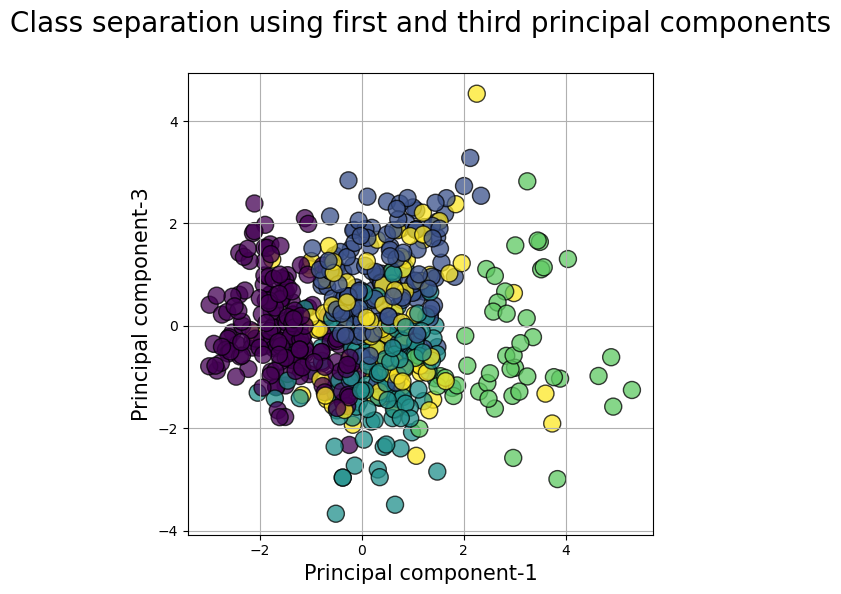

In [223]:
dfx_trans = pca.transform(df_large)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(6,6))
plt.scatter(dfx_trans[0],dfx_trans[2],c=y_pred,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first and third principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-3",fontsize=15)
plt.show()

In [224]:
original_file = pd.read_csv('data/pokedex_(Update_05.20).csv')[['name','type_1','type_2','status','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]

#drop all legendary, mythical etc.
original_file = original_file[original_file['status']=='Normal']
original_file = original_file.drop(['status'],axis=1)
original_file_large = original_file[original_file['total_points']>350]

In [225]:
original_file_large

,name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
5,Charmeleon,Fire,NaN,405.0,58.0,64.0,58.0,80.0,65.0,80.0
6,Charizard,Fire,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0
...,...,...,...,...,...,...,...,...,...,...
1016,Dracovish,Water,Dragon,505.0,90.0,90.0,100.0,70.0,80.0,75.0
1017,Arctovish,Water,Ice,505.0,90.0,90.0,100.0,80.0,90.0,55.0
1018,Duraludon,Steel,Dragon,535.0,70.0,95.0,115.0,120.0,50.0,85.0
1020,Drakloak,Dragon,Ghost,410.0,68.0,80.0,50.0,60.0,50.0,102.0


In [231]:
original_file_large

,name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
5,Charmeleon,Fire,NaN,405.0,58.0,64.0,58.0,80.0,65.0,80.0
6,Charizard,Fire,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0
...,...,...,...,...,...,...,...,...,...,...
1016,Dracovish,Water,Dragon,505.0,90.0,90.0,100.0,70.0,80.0,75.0
1017,Arctovish,Water,Ice,505.0,90.0,90.0,100.0,80.0,90.0,55.0
1018,Duraludon,Steel,Dragon,535.0,70.0,95.0,115.0,120.0,50.0,85.0
1020,Drakloak,Dragon,Ghost,410.0,68.0,80.0,50.0,60.0,50.0,102.0


In [232]:
#add clusters to data
y_pred_df = pd.DataFrame(y_pred)
cluster_df = pd.concat([original_file_large,y_pred_df.set_index(original_file_large.index)],axis=1)
cluster_df = cluster_df.rename({0:'cluster'},axis=1)

In [234]:
mean_df = cluster_df.iloc[:,3:24].groupby(by='cluster').mean()
mean_df

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
cluster,,,,,,,
0,412.875676,63.756757,78.124324,65.854054,66.459459,63.924324,74.756757
1,500.840237,72.177515,77.970414,73.698225,99.875740,87.786982,89.331361
2,491.508772,106.263158,100.078947,79.798246,69.701754,75.710526,59.956140
3,610.555556,82.000000,133.866667,98.222222,109.000000,95.444444,92.022222
4,482.854167,65.885417,90.270833,123.708333,63.197917,90.270833,49.520833


In [235]:
import plotly.graph_objs as go

In [236]:
max_df = mean_df
max_df['total_points'] = mean_df['total_points']/mean_df['total_points'].max()
max_df['hp'] = mean_df['hp']/mean_df['hp'].max()
max_df['attack'] = mean_df['attack']/mean_df['attack'].max()
max_df['defense'] = mean_df['defense']/mean_df['defense'].max()
max_df['sp_attack'] = mean_df['sp_attack']/mean_df['sp_attack'].max()
max_df['sp_defense'] = mean_df['sp_defense']/mean_df['sp_defense'].max()
max_df['speed'] = mean_df['speed']/mean_df['speed'].max()

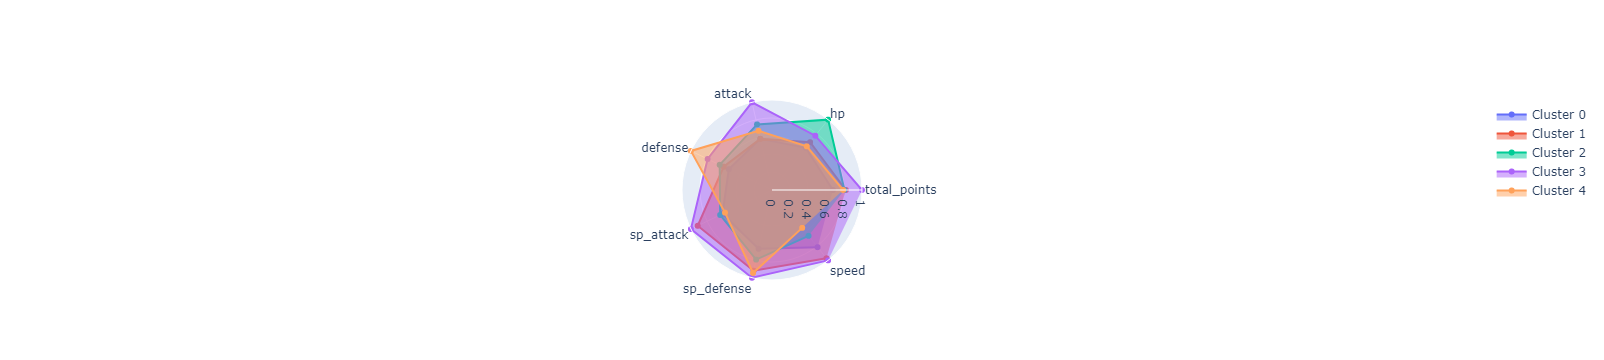

In [237]:
#Radar plot: Attempt to plot as % of max of column

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = mean_df.columns
cluster_list = [0,1,2,3,4]
# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in cluster_list:
    # Select column values in df_scaled
    radius = max_df.loc[i].values
    # Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
polar=dict (radialaxis = dict(visible = True,range=[0,1])),
showlegend=True
        )

chart.show()

In [245]:
#create boolean column for each type (True if has type at all)
cluster_df['Normal'] = (cluster_df['type_1']=='Normal') | (cluster_df['type_2']=='Normal')
cluster_df['Bug'] = (cluster_df['type_1']=='Bug') | (cluster_df['type_2']=='Bug')
cluster_df['Water'] = (cluster_df['type_1']=='Water') | (cluster_df['type_2']=='Water')
cluster_df['Fire'] = (cluster_df['type_1']=='Fire') | (cluster_df['type_2']=='Fire')
cluster_df['Grass'] = (cluster_df['type_1']=='Grass') | (cluster_df['type_2']=='Grass')
cluster_df['Ghost'] = (cluster_df['type_1']=='Ghost') | (cluster_df['type_2']=='Ghost')
cluster_df['Psychic'] = (cluster_df['type_1']=='Psychic') | (cluster_df['type_2']=='Psychic')
cluster_df['Dark'] = (cluster_df['type_1']=='Dark') | (cluster_df['type_2']=='Dark')
cluster_df['Fighting'] = (cluster_df['type_1']=='Fighting') | (cluster_df['type_2']=='Fighting')
cluster_df['Ground'] = (cluster_df['type_1']=='Ground') | (cluster_df['type_2']=='Ground')
cluster_df['Rock'] = (cluster_df['type_1']=='Rock') | (cluster_df['type_2']=='Rock')
cluster_df['Flying'] = (cluster_df['type_1']=='Flying') | (cluster_df['type_2']=='Flying')
cluster_df['Electric'] = (cluster_df['type_1']=='Electric') | (cluster_df['type_2']=='Electric')
cluster_df['Ice'] = (cluster_df['type_1']=='Ice') | (cluster_df['type_2']=='Ice')
cluster_df['Dragon'] = (cluster_df['type_1']=='Dragon') | (cluster_df['type_2']=='Dragon')
cluster_df['Fairy'] = (cluster_df['type_1']=='Fairy') | (cluster_df['type_2']=='Fairy')
cluster_df['Poison'] = (cluster_df['type_1']=='Poison') | (cluster_df['type_2']=='Poison')
cluster_df['Steel'] = (cluster_df['type_1']=='Steel') | (cluster_df['type_2']=='Steel')

#change to 0/1
cluster_df.iloc[:,11:29] = cluster_df.iloc[:,11:29].astype('int')

In [246]:
type_df = cluster_df.iloc[:,10:29].groupby('cluster').mean()

In [247]:
round(type_df*100,2)

,Normal,Bug,Water,Fire,Grass,Ghost,Psychic,Dark,Fighting,Ground,Rock,Flying,Electric,Ice,Dragon,Fairy,Poison,Steel
cluster,,,,,,,,,,,,,,,,,,
0,18.92,11.89,14.05,8.65,10.81,3.24,5.41,9.19,6.49,5.95,8.11,14.05,8.11,3.24,4.32,3.24,9.19,2.16
1,8.28,7.10,13.61,14.20,12.43,7.10,18.93,3.55,4.73,1.78,1.78,15.38,14.79,7.10,4.73,10.06,8.28,3.55
2,19.30,1.75,20.18,5.26,9.65,2.63,6.14,9.65,11.40,16.67,8.77,8.77,5.26,11.40,4.39,4.39,6.14,3.51
3,6.67,6.67,13.33,11.11,6.67,6.67,8.89,17.78,13.33,8.89,8.89,15.56,2.22,4.44,31.11,4.44,2.22,11.11
4,3.12,13.54,14.58,4.17,13.54,16.67,4.17,6.25,5.21,12.50,23.96,4.17,2.08,4.17,3.12,4.17,5.21,23.96


In [248]:
import seaborn as sns

In [273]:
type_df.iloc[i].sort_values(ascending=False).index

Index(['Normal', 'Flying', 'Water', 'Bug', 'Grass', 'Poison', 'Dark', 'Fire',
       'Electric', 'Rock', 'Fighting', 'Ground', 'Psychic', 'Dragon', 'Ice',
       'Fairy', 'Ghost', 'Steel'],
      dtype='object')

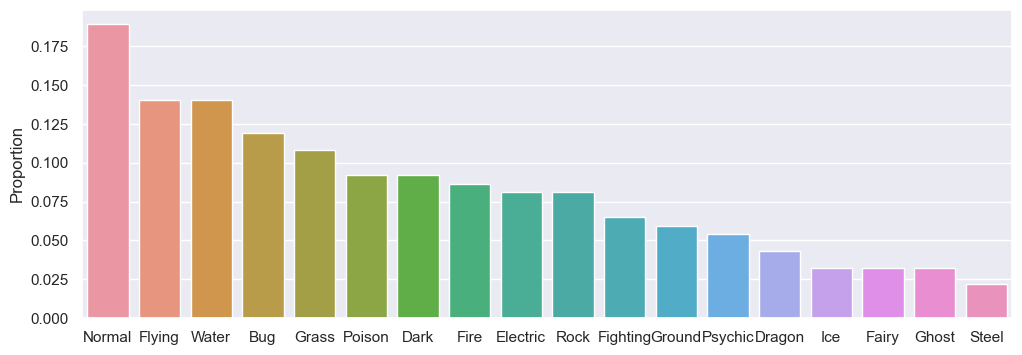

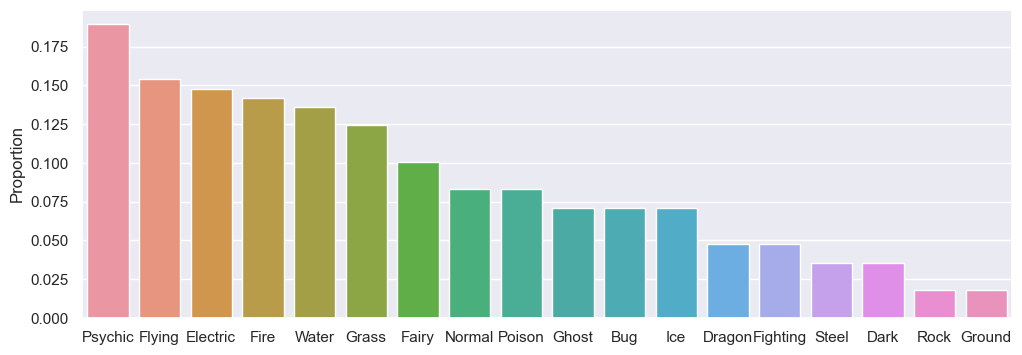

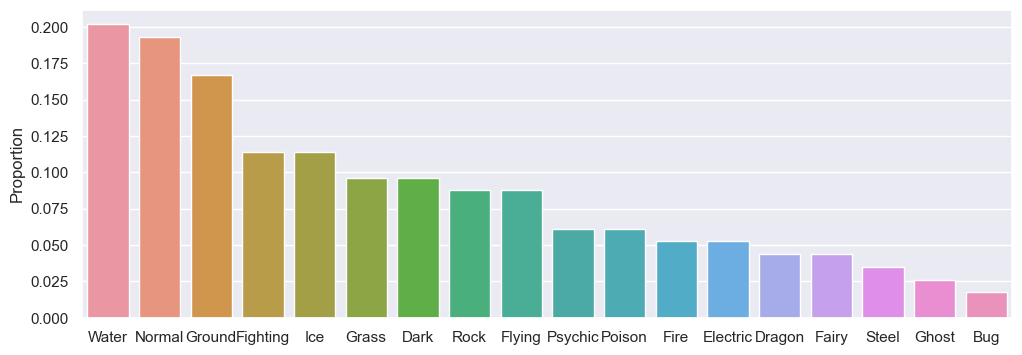

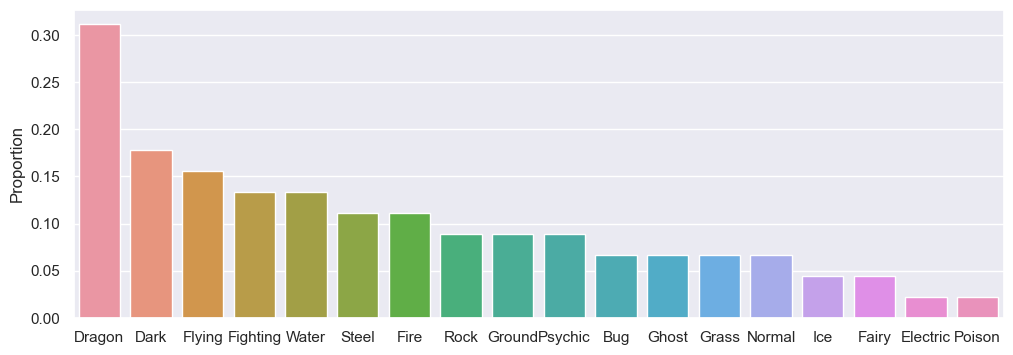

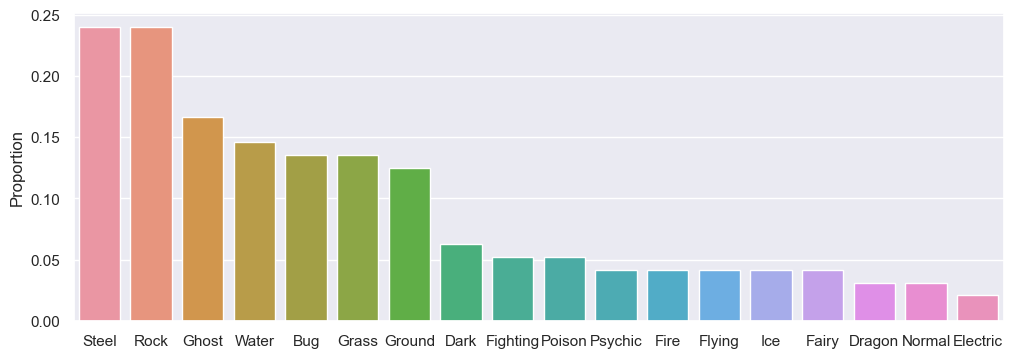

In [280]:
for i in range(len(type_df)):
    sns.set(rc={'figure.figsize':(12,4)})
    sns.barplot(x=type_df.iloc[i].sort_values(ascending=False).index, y = type_df.iloc[i].sort_values(ascending=False))
    plt.ylabel('Proportion')
    plt.show()